By Ramya Neelakantan

In [1]:
# 1. Implement KNN algorithm without using sci-kit learn library in Python. Use Iris dataset 
# 2. Split the Iris dataset into 60% train and 40% test. Evaluate (find accuracy) of KNN algorithm on 
#    different values of K. Use sci-kit learn library to execute KNN algorithm. Take K = 1, 3, 5, 7, 9. 
#    Using matplotlib library, draw accuracy (X-axis) vs K (Y-axis) plot. What is the knee point ? 
# 3. Run Naive Bayes algorithm using sci-kit learn library in Python.
# Run naive bayes for different configurations of train:test split, namely 50:50, 60:40, 70:30, 80:20 and 90:10. For each configuration, compute precision and recall values (both expressed as percentage). Use matplotlib to draw bar plots (in single plot) for precision & recall for each configuration. On X-axis, write configurations and on Y-axis is percentage to represent precision and recall. Use a red bar for precision and blue bar for recall. (Refer: https://matplotlib.org/gallery/statistics/barchart_demo.html)
# 4. Use Naive Bayes to perform sentiment analysis.
#    Run naive bayes for different configurations of train:test split, namely 50:50, 60:40, 70:30, 
#    80:20 and 90:10. For each configuration, compute accuracy (expressed as percentage). 
#    Use matplotlib to draw line plot (in single plot) for accuracy percentages for each configuration. 
#    On X-axis, write configurations and on Y-axis is percentage to represent accuracy.
# 5. Use the titanic dataset mentioned in the tutorial link below, perform hyperparameter tuning
#    for decision tree classifier. Use cross validation = 5.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import RegexpTokenizer

from math import sqrt

In [3]:
# 1. 
class knn(object) : 
    def __init__(self, k):
        self.k = k
        
    @staticmethod
    def eucledian_distance(row1, row2) :
        row1, row2 = np.array(row1), np.array(row2)
        d = 0
        for i in range(len(row1) - 1) : 
            d += (row1[i] - row2[i]) ** 2
        return np.sqrt(d)

    def predict(self, train_set, test_instance) : 
        distances = []
        for i in range(len(train_set)) : 
            dist = self.eucledian_distance(train_set[i][:-1], test_instance)
            distances.append((train_set[i], dist))
        distances.sort(key = lambda x : x[1])
    
        neighbors = []
        for i in range(self.k) :
            neighbors.append(distances[i][0])
        
        classes = {}
        for i in range(len(neighbors)) : 
            response = neighbors[i][-1]
            if response in classes : 
                classes[response] += 1
            else :
                classes[response] = 1
    
        sorted_classes = sorted(classes.items(), key = lambda x:x[1], reverse = True)
        return sorted_classes[0][0]

    @staticmethod
    def evaluate(y_test, y_pred) : 
        n_correct = 0
        for act, pred in zip(y_test, y_pred) : 
            if act == pred:
                n_correct += 1
        return n_correct / len(y_test)


In [4]:
data = pd.read_csv('Iris.csv')
iris_df = pd.DataFrame(data)

In [5]:
def Train_Test_Split(dataset, test_size = 0.3) : 
    n_test = int(len(dataset) * test_size)
    test_set = dataset.sample(n_test)
    train_set = []
    for ind in dataset.index : 
        if ind in test_set.index:
            continue
        train_set.append(dataset.iloc[ind])
    
    train_set = pd.DataFrame(train_set).astype(float).values.tolist()
    test_set = test_set.astype(float).values.tolist()
    return train_set, test_set

In [6]:
train_set, test_set = Train_Test_Split(iris_df)

In [7]:
knn = knn(k = 5)
preds = []

for row in test_set : 
    predictors_only = row[:-1]
    prediction = knn.predict(train_set, predictors_only)
    preds.append(prediction)

actual = np.array(test_set)[:, -1]
knn.evaluate(actual, preds)

0.9777777777777777

---------------------------------------------------------------------------------------------------------------------

In [8]:
# 2. 
data = pd.read_csv('Iris.csv')
iris_df = pd.DataFrame(data)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [9]:
x = iris_df.drop('Species', axis = 1)
y = iris_df['Species']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [11]:
k_val = []
accuracy = []

for k in range(1, 10, 2) :
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    k_val.append(k)
    accuracy.append(accuracy_score(y_test, pred))

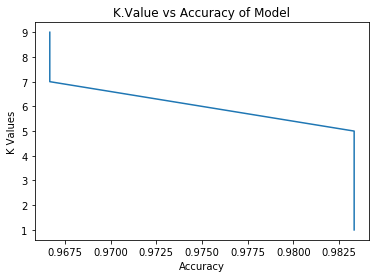

Knee Point :  0.9833333333333333 at k = 1


In [12]:
plt.plot(accuracy, k_val)
plt.xlabel('Accuracy')
plt.ylabel('K Values')
plt.title('K.Value vs Accuracy of Model')
plt.show()
print("Knee Point : ", max(accuracy), 'at k =', k_val[accuracy.index(max(accuracy))])

---------------------------------------------------------------------------------------------------------------------

In [13]:
# 3. 
data = pd.read_csv('winequality-red.csv', delimiter = ';')
wine_df = pd.DataFrame(data)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
x = wine_df.iloc[:, :11]
y = wine_df.iloc[:, -1]

In [15]:
precisions = []
recalls = []

for i in range(50, 100, 10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = i / 100)
    model = GaussianNB()
    result = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    CR = classification_report(y_test, y_pred, output_dict = True)
    p_sum, r_sum = 0, 0
    for i in range(3, 9):
        p_sum += CR[str(i)]['precision']
        r_sum += CR[str(i)]['recall']
    precisions.append((p_sum / 6))
    recalls.append((r_sum / 6))

for precision in precisions :
    precision *= 100
    
for recall in recalls : 
    recall *= 100

/Users/ramyaneelakantan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ramyaneelakantan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


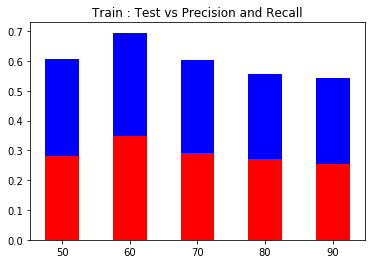

In [16]:
configurations = [50,60,70,80,90]

plt.bar(range(50, 100, 10), precisions, color = 'red', width = 5)
plt.bar(configurations, recalls, bottom = precisions, color = 'blue', width = 5)
plt.title('Train : Test vs Precision and Recall')
plt.show()

---------------------------------------------------------------------------------------------------------------------

In [17]:
# 4. 
pd.set_option('display.max_colwidth', 100)
data = pd.read_csv('train.tsv', sep = '\t')
train_df = pd.DataFrame(data)
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage that what is good for the goose is also good for t...,1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [19]:
train_df['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

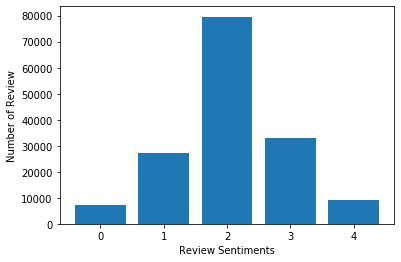

In [20]:
s_count = data.groupby('Sentiment').count()
plt.bar(s_count.index.values, s_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [21]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase = True, stop_words = 'english', ngram_range = (1,1), tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['Phrase'])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(text_counts, data['Sentiment'], test_size = 0.3, random_state = 1)

In [23]:
model = MultinomialNB()
result = model.fit(x_train, y_train)
predicted = result.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, predicted))

Accuracy :  0.6049169122986885


---------------------------------------------------------------------------------------------------------------------

In [24]:
# 5. 
data = pd.read_csv('titanic.csv')
df = pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

In [26]:
df.replace({'male' : 0, 'female' : 1}, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


In [27]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [28]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [29]:
x = df.drop('Survived', axis = 1)
y = df['Survived']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [31]:
model = DecisionTreeClassifier()

In [32]:
# Hyperparameter Tuning
model = DecisionTreeClassifier()
parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(1,10),
    'min_samples_split' : range(2,10),
    'min_samples_leaf' : range(1,5)
}

grid = GridSearchCV(model, param_grid = parameters, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 107 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:   12.3s finished
/Users/ramyaneelakantan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'm

In [33]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [34]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, min_samples_leaf = 3, min_samples_split = 2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8251121076233184